In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sklearn
sklearn.__version__

'0.20.0'

In [4]:
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [5]:
data = pd.read_csv('final_dataset.csv')

In [6]:
len(data.columns)

20

In [7]:
data.head()

,URL,1,2,5,7,9,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,yes,3,-1,N-N,N-N,N-N,253,0,3664.0,135,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,no,2,1,155.3191489,100,0,256,0,6619.0,295,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,yes,3,1,293.4911243,100,0,36,0,NaN,44,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,no,3,1,N-N,N-N,N-N,58,0,717.0,80,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,yes,3,1,N-N,N-N,N-N,716,1,NaN,51,-1,1,1,-1


# DATA CLEANING

In [8]:
data[data['URL'] == "url"]

,URL,1,2,5,7,9,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
1705,url,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,result,1,1,N-N,N-N,N-N,-1,-1,NaN,3,-1,1,1,-1


In [9]:
data.drop(1705,axis=0,inplace=True)

In [10]:
data.columns

Index(['URL', '1', '2', '5', '7', '9', 'Phishing', 'Subdomains',
       'Prefix-Suffix', 'Anchor Tag', 'Tags', 'Forms', 'SSL Expiry Date',
       'SSL Cert Check', 'Alexa Ranking', 'URL Length', 'URL Shortened',
       'Redirects User', 'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

# Cleaning Anchor Tag feature

In [11]:
data[data['Anchor Tag'] == 'N-N']['Phishing'].value_counts()

yes    875
no     179
Name: Phishing, dtype: int64

In [94]:
data['Anchor Tag'].replace('N-N',np.nan,inplace=True)

In [104]:
data['Anchor Tag'] = data['Anchor Tag'].astype(float)

In [106]:
data['Anchor Tag'] = round(data['Anchor Tag'],ndigits=0)

In [121]:
def impute_anchors_val(vals):
    anc = vals[0]
    phish = vals[1]
    if phish == 'yes' and pd.isnull(anc):
        return 300
    elif phish == 'no' and pd.isnull(anc):
        return 150
    else:
        return anc

In [124]:
data['Anchor Tag'] = data[['Anchor Tag', 'Phishing']].apply(impute_anchors_val,axis=1)

In [127]:
data[data['Anchor Tag'].isnull()]

,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking


In [129]:
data[data['Phishing'] == 'yes']['Anchor Tag'].mean()

268.5291902071563

In [130]:
data[data['Phishing'] == 'no']['Anchor Tag'].mean()

162.8074074074074

# Tags feature processing

In [141]:
data['Tags'].value_counts()

N-N    1118
100    1024
Name: Tags, dtype: int64

OBSERVATION: It is better to exclude this feature as not much useful information can be extracted from it. Moreover, for more than half the data points the information is not available (exception case)

# Forms feature processing

In [147]:
data[data['Phishing'] == 'no']['Forms'].value_counts()

1      447
0      442
N-N    175
-1      16
Name: Forms, dtype: int64

In [148]:
data[data['Phishing'] == 'yes']['Forms'].value_counts()

N-N    875
1      102
0       79
-1       6
Name: Forms, dtype: int64

In [151]:
data['Forms'].replace('N-N',np.nan, inplace=True)

In [159]:
# This function checks whether any information related to the form links is available or not
def form_info_available(form_val):
    val = form_val[0]
    if pd.isnull(val):
        return 0
    return 1

In [161]:
data['Forms'] = data[['Forms']].apply(form_info_available,axis=1)

In [185]:
data[data['Phishing'] == "yes"]['SSL Expiry Date'].value_counts()

-1       543
 253      59
 252      33
 39       19
 62       16
 55       16
 2501     10
 35        9
 22        8
 80        8
 85        8
 64        8
 36        8
 43        8
 12        8
 251       7
 42        7
 84        7
 76        7
 79        7
 54        6
 70        6
 243       6
 37        6
 61        6
 44        6
 2500      5
 11        5
 75        5
 41        5
        ... 
 654       1
 676       1
 715       1
 731       1
 742       1
 9043      1
 857       1
 286       1
 282       1
 264       1
 175       1
 98        1
 99        1
 126       1
 2193      1
 148       1
 9157      1
 158       1
 167       1
 179       1
 235       1
 180       1
 182       1
 190       1
 204       1
 218       1
 227       1
 229       1
 6374      1
 154       1
Name: SSL Expiry Date, Length: 141, dtype: int64

# Alexa Ranking Feature Processing

In [196]:
data[data['Phishing'] == "no"]['Alexa Ranking'].median()

7538.0

In [197]:
data[data['Phishing'] == "yes"]['Alexa Ranking'].median()

538085.0

In [198]:
def impute_alexa(vals):
    rank = vals[0]
    phis = vals[1]
    if pd.isnull(rank):
        if phis == "no":
            return 7500
        else:
            return 538000
    return rank

In [201]:
data['Alexa Ranking'] = data[['Alexa Ranking', 'Phishing']].apply(impute_alexa,axis=1)

In [203]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'number_of_dots',
       'host_has_dash', 'dictionary_word', 'http_in_hostname',
       'targeted_brand', 'redirecting url', 'ext url', 'Phishing',
       'Subdomains', 'Prefix-Suffix', 'Anchor Tag', 'Tags', 'Forms',
       'SSL Expiry Date', 'SSL Cert Check', 'Alexa Ranking'],
      dtype='object')

In [213]:
data['SSL Expiry Date'].groupby(data['Phishing']).mean()

Phishing
no     223.114815
yes    149.979284
Name: SSL Expiry Date, dtype: float64

In [228]:
data[data['Phishing'] == "yes"]['SSL Expiry Date'].value_counts()

-1       543
 253      59
 252      33
 39       19
 62       16
 55       16
 2501     10
 35        9
 22        8
 80        8
 85        8
 64        8
 36        8
 43        8
 12        8
 251       7
 42        7
 84        7
 76        7
 79        7
 54        6
 70        6
 243       6
 37        6
 61        6
 44        6
 2500      5
 11        5
 75        5
 41        5
        ... 
 654       1
 676       1
 715       1
 731       1
 742       1
 9043      1
 857       1
 286       1
 282       1
 264       1
 175       1
 98        1
 99        1
 126       1
 2193      1
 148       1
 9157      1
 158       1
 167       1
 179       1
 235       1
 180       1
 182       1
 190       1
 204       1
 218       1
 227       1
 229       1
 6374      1
 154       1
Name: SSL Expiry Date, Length: 141, dtype: int64

In [219]:
data[data['Phishing'] == "no"]['SSL Expiry Date'].value_counts()

-1      161
 69      78
 68      26
 163     14
 182     13
 219     12
 316     10
 380     10
 67      10
 151     10
 322      9
 626      9
 249      8
 77       8
 315      8
 74       7
 150      7
 434      7
 582      7
 93       7
 176      7
 49       7
 133      7
 34       7
 750      7
 147      6
 193      6
 66       6
 180      6
 175      6
       ... 
 191      1
 294      1
 298      1
 423      1
 351      1
 409      1
 408      1
 406      1
 404      1
 391      1
 390      1
 389      1
 387      1
 382      1
 359      1
 358      1
 348      1
 303      1
 344      1
 341      1
 339      1
 337      1
 333      1
 325      1
 323      1
 317      1
 313      1
 311      1
 307      1
 287      1
Name: SSL Expiry Date, Length: 326, dtype: int64

In [229]:
def impute_expiry(vals):
    days = vals[0]
    phis = vals[1]
    if days == -1:
        if phis == 'yes':
            return 69
        else:
            return 253
    return days

In [231]:
data["SSL Expiry Date"] = data[['SSL Expiry Date','Phishing']].apply(impute_expiry, axis=1)

In [232]:
data.head()

,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,-1,1,1,-1,-1,-1,-1,yes,3,-1,300.0,N-N,0,253,0,3664.0
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,-1,-1,-1,-1,no,2,1,155.0,100,1,256,0,6619.0
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,-1,-1,-1,-1,yes,3,1,293.0,100,1,36,0,538000.0
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,-1,-1,-1,-1,no,3,1,150.0,N-N,0,58,0,717.0
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,-1,-1,-1,1,-1,-1,yes,3,1,300.0,N-N,0,716,1,538000.0


In [235]:
data.to_csv("final_cleaned_dataset.csv",index=False)

In [8]:
data = pd.read_csv("final_cleaned_dataset.csv")

In [9]:
data.drop(['Tags'],axis=1, inplace=True)

In [10]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,yes,3,-1,300,0,253,0,3664,135,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,no,2,1,155,1,256,0,6619,295,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,yes,3,1,293,1,36,0,538000,44,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,no,3,1,150,0,58,0,717,80,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,yes,3,1,300,0,716,1,538000,51,-1,1,1,-1


In [11]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

In [12]:
data.describe()

,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2.142000e+03,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,0.351541,-0.992530,-0.433240,-0.478992,5.282913,2.776844,0.758170,215.224090,0.509804,223.690943,-0.229692,1.076952e+06,87.266573,-0.875817,0.985061,0.983193,-0.456583
std,0.859676,0.122026,0.901489,0.878024,24.216451,0.784998,0.652209,90.402299,0.500021,456.308753,0.612417,3.095277e+06,97.352935,0.482756,0.172248,0.182610,0.889889
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,0.000000,8.000000,-1.000000,1.000000e+00,3.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000,150.000000,0.000000,69.000000,-1.000000,4.243250e+03,40.000000,-1.000000,1.000000,1.000000,-1.000000
50%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,1.000000,209.000000,1.000000,88.500000,0.000000,5.380000e+05,63.000000,-1.000000,1.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,-1.000000,3.000000,1.000000,300.000000,1.000000,253.000000,0.000000,5.380000e+05,98.000000,-1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,10.000000,1.000000,300.000000,1.000000,9803.000000,1.000000,1.999684e+07,1457.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 19 columns):
URL                        2142 non-null object
embedded_domain_in_path    2142 non-null int64
ip_address                 2142 non-null int64
dictionary_word            2142 non-null int64
targeted_brand             2142 non-null int64
ext url                    2142 non-null int64
Phishing                   2142 non-null object
Subdomains                 2142 non-null int64
Prefix-Suffix              2142 non-null int64
Anchor Tag                 2142 non-null int64
Forms                      2142 non-null int64
SSL Expiry Date            2142 non-null int64
SSL Cert Check             2142 non-null int64
Alexa Ranking              2142 non-null int64
URL Length                 2142 non-null int64
URL Shortened              2142 non-null int64
Redirects User             2142 non-null int64
URL has @ Symbol           2142 non-null int64
URL has HTTPS              2142 non-null int6

In [14]:
data['embedded_domain_in_path'].groupby(data['Phishing']).value_counts()

Phishing  embedded_domain_in_path
no         1                         793
          -1                         237
           0                          50
yes        1                         507
          -1                         310
           0                         245
Name: embedded_domain_in_path, dtype: int64

Text(0.5,0,"['Malicious candidate', 'Suspect', 'Safe candidate']")

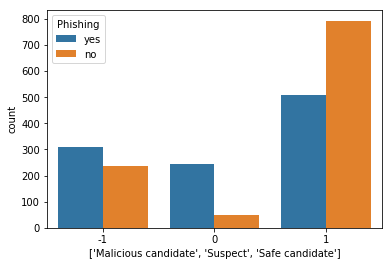

In [15]:
sns.countplot(x='embedded_domain_in_path',data= data, hue = 'Phishing')
plt.xlabel(['Malicious candidate', 'Suspect', 'Safe candidate'])

In [16]:
# Status: Included for model

In [17]:
data['ip_address'].value_counts()

-1    2134
 1       8
Name: ip_address, dtype: int64

In [18]:
# Status: Drop it (No useful information can be obtained from this feature)

In [19]:
# Note: Check for the source and validity of dictionary word and targeted blank and ext url

In [20]:
data['targeted_brand'].groupby(data['Phishing']).value_counts()

Phishing  targeted_brand
no        -1                837
           1                243
yes       -1                747
           1                315
Name: targeted_brand, dtype: int64

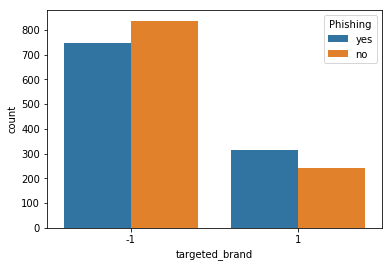

In [21]:
sns.countplot(x="targeted_brand",hue="Phishing",data= data)

In [22]:

data[pd.isnull(data['Subdomains'])]

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS


Observations: When the number of subdomains are more than 5, it is highly likely the site is malicious

In [24]:
#Status: Include it

In [25]:
numerical_features = []
numerical_features.append('Subdomains')

In [26]:
data['Prefix-Suffix'].groupby(data['Phishing']).value_counts()

Phishing  Prefix-Suffix
no         1               1039
          -1                 41
yes        1                844
          -1                218
Name: Prefix-Suffix, dtype: int64

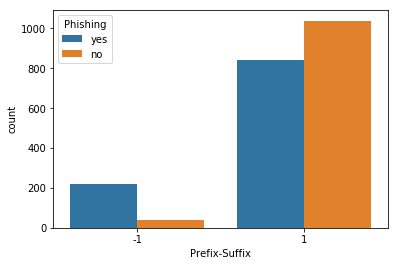

In [27]:
sns.countplot(x= 'Prefix-Suffix',data= data, hue='Phishing')

In [28]:
#Status include it  (most of the malicious candidates are correctly attributes)

In [29]:
data['Anchor Tag'].describe()

count    2142.000000
mean      215.224090
std        90.402299
min         1.000000
25%       150.000000
50%       209.000000
75%       300.000000
max       300.000000
Name: Anchor Tag, dtype: float64

In [30]:
data['Anchor Tag'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,162.807407,65.450715,1.0,150.0,179.5,200.0,300.0
yes,1062.0,268.529190,80.586660,1.0,300.0,300.0,300.0,300.0


In [31]:
numerical_features.append('Anchor Tag')

Observation: As Anchor tag feature reach higher values the site tends to be Phishing

In [33]:
#Status:  Definitely Include (seams to be important feature upon initial analysis)

In [34]:
data['Forms'].value_counts()

1    1092
0    1050
Name: Forms, dtype: int64

In [35]:
# 0: Data about forms not fetched
# 1: Data about forms fetched

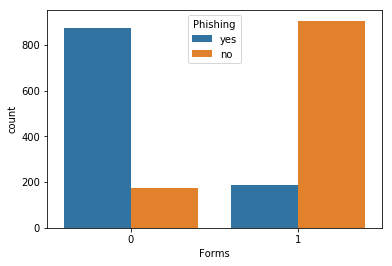

In [36]:
sns.countplot(x="Forms", hue="Phishing", data=data)

GREAT FEATURE!
Most of the safe candidates and malicious candidates are classified correctly

In [37]:
# Status: Definitely Include (Important parameter)

In [38]:
data['SSL Expiry Date'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,260.979630,209.460606,8.0,92.75,249.0,326.00,2501.0
yes,1062.0,185.770245,610.484474,11.0,69.00,69.0,84.75,9803.0


Mean Expiry Date for Phishing websites is slightly lower than that of safe websites. However, it would be too agressive to draw conclusions.

High Overlapping can be seen except the highly skewed values

In [40]:
# Status : Let's keep it 

In [41]:
numerical_features.append('SSL Expiry Date')

In [42]:
data['SSL Cert Check'].value_counts()

 0    1226
-1     704
 1     212
Name: SSL Cert Check, dtype: int64

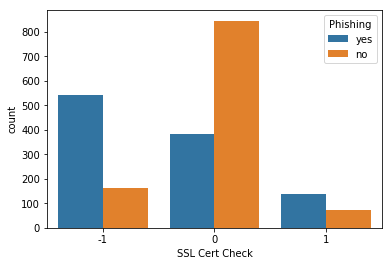

In [43]:
sns.countplot(x='SSL Cert Check', hue='Phishing', data=data)

In [44]:
#Status : Keep it

In [45]:
data['Alexa Ranking'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,6.350705e+05,2.290722e+06,1.0,599.5,7500.0,134548.0,19171314.0
yes,1062.0,1.526323e+06,3.687241e+06,1482.0,538000.0,538000.0,538000.0,19996840.0


In [47]:
numerical_features.append('Alexa Ranking')

In [48]:
#Status: keep it

In [49]:
numerical_features.append('URL Length')

In [50]:
data['URL Shortened'].value_counts()

-1    2009
 1     133
Name: URL Shortened, dtype: int64

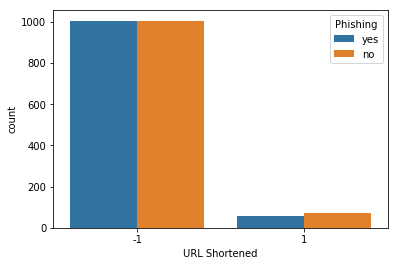

In [51]:
sns.countplot(x="URL Shortened", hue="Phishing", data= data)

In [52]:
# Not much information ; 

In [53]:
data['Redirects User'].value_counts()

 1    2126
-1      16
Name: Redirects User, dtype: int64

In [54]:
# Not enough distinction

In [55]:
data['URL has @ Symbol'].value_counts()

 1    2124
-1      18
Name: URL has @ Symbol, dtype: int64

In [56]:
# Not enough distinction

In [57]:
data['URL has HTTPS'].value_counts()

-1    1560
 1     582
Name: URL has HTTPS, dtype: int64

In [58]:
numerical_features

['Subdomains', 'Anchor Tag', 'SSL Expiry Date', 'Alexa Ranking', 'URL Length']

In [59]:
pairs = numerical_features

In [60]:
pairs.append('Phishing')

In [64]:
numerical_features.remove("Phishing")

ValueError: list.remove(x): x not in list

In [66]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

In [67]:
model = TSNE(n_components=2, random_state=0)

In [68]:
X = data.drop(['Phishing','URL'],axis=1)

In [69]:
data['Phishing'].replace('yes','1',inplace=True)

In [70]:
data['Phishing'].replace('no','0',inplace=True)

In [71]:

y = data['Phishing']

In [ ]:


tsne_data = model.fit_transform(X)

In [ ]:
tsne_data = np.vstack((tsne_data.T, y)).T

In [148]:
tsne_data

array([[-18.12958526611328, -27.14824676513672, '1'],
       [-45.64045715332031, -23.952043533325195, '0'],
       [22.156965255737305, 38.51922607421875, '1'],
       ...,
       [36.304779052734375, 20.637802124023438, '0'],
       [37.55514144897461, 21.1378173828125, '0'],
       [70.81363677978516, -1.3471229076385498, '1']], dtype=object)

In [149]:
len(tsne_data)

2142

In [150]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
tsne_df.head()

,Dim_1,Dim_2,label
0,-18.1296,-27.1482,1
1,-45.6405,-23.952,0
2,22.157,38.5192,1
3,25.8022,19.3927,0
4,-14.8906,-4.23886,1


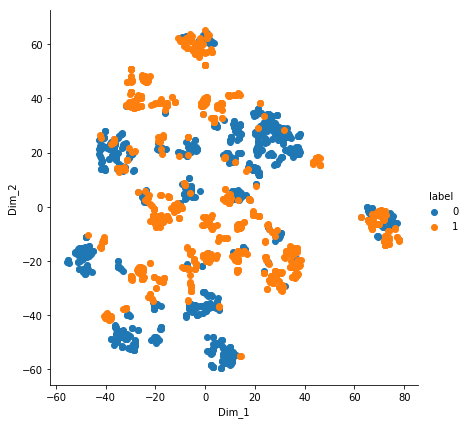

In [151]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Observations

- T-SNE plot has made some well defined clusters
- Generally the central area is covered by label - 1 i.e. Phishing websites while, label-0 or safe website have some clusters around the edges
- Algorithms like K-NN might work wonders on this dataset ; Forest techniques and ensemble learning looks promising as well.
- Overfitting may ruin the model as this application of detecting malicious websites will observe so much unseen data once productionized

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
X_train.shape

(1499, 17)

In [75]:
neighbors = list(range(1,50,2))

In [76]:
cv_scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())

CV_SCORES:  [0.9533670533505194, 0.9466601182274766, 0.9499713172437294, 0.9412776271537993, 0.9439310487873535, 0.9426066047379884, 0.9352818051172644, 0.9345973006207682, 0.9286015971080197, 0.9212412996133162, 0.9159299228113842, 0.9139254485384537, 0.909916381468806, 0.9065606767708194, 0.9045739218039319, 0.8965736254944664, 0.8959336266797043, 0.8972581299909625, 0.8972270471280204, 0.9012583077766421, 0.9059384565239936, 0.9046050639287673, 0.9059296265019187, 0.9019250337052018, 0.9019206186941642]


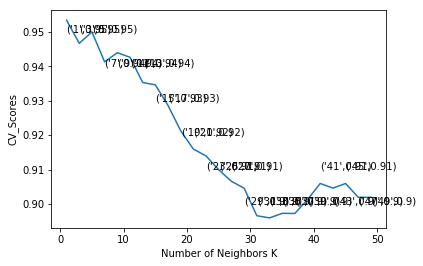

In [77]:
plt.plot(neighbors, cv_scores)
for xy in zip(neighbors,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)

In [78]:
for xy in zip(neighbors,np.round(cv_scores,2)):
    print(xy)

(1, 0.95)
(3, 0.95)
(5, 0.95)
(7, 0.94)
(9, 0.94)
(11, 0.94)
(13, 0.94)
(15, 0.93)
(17, 0.93)
(19, 0.92)
(21, 0.92)
(23, 0.91)
(25, 0.91)
(27, 0.91)
(29, 0.9)
(31, 0.9)
(33, 0.9)
(35, 0.9)
(37, 0.9)
(39, 0.9)
(41, 0.91)
(43, 0.9)
(45, 0.91)
(47, 0.9)
(49, 0.9)


In [79]:
optimal_k = 5

In [80]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response

pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 94.867807%


In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test,pred)

array([[321,  14],
       [ 19, 289]], dtype=int64)

In [83]:
conf_matrix = confusion_matrix(y_test,pred)

In [84]:
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

In [85]:
print(tpr*100)
print(tnr*100)
print(fpr*100)
print(fnr*100)
print("Precision:"+str(tp*100/(tp+fp)))
print("Recall:"+str(tpr*100))

93.83116883116884
95.82089552238806
4.179104477611941
6.1688311688311686
Precision:95.37953795379538
Recall:93.83116883116884


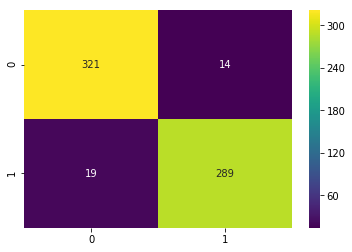

In [86]:
sns.heatmap(conf_matrix,annot=True, cmap='viridis', fmt='g')

Iteration 10 Complete [Time Taken For Last Iteration: 4.02 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 3.65 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 3.94 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 3.91 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 3.95 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 3.99 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 3.92 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 3.97 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 3.93 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 3.88 Seconds]


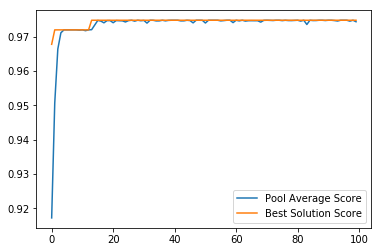

In [87]:
from geneticfs import GeneticFS

gen_model = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [88]:
binary_output_of_optimal_variables

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [89]:
indicies_of_optimal_variables

[1, 3, 7, 8, 9, 10, 14, 16]

In [90]:
X.columns[indicies_of_optimal_variables]

Index(['ip_address', 'targeted_brand', 'Anchor Tag', 'Forms',
       'SSL Expiry Date', 'SSL Cert Check', 'Redirects User', 'URL has HTTPS'],
      dtype='object')

In [ ]:
reduced_X = X['Subdomains', 'Anchor Tag', 'Forms', 'SSL Expiry Date','SSL Cert Check', 'Redirects User']

In [91]:
reduced_X = X[X.columns[indicies_of_optimal_variables]]

In [95]:
rX_train, rX_test, ry_train, ry_test = train_test_split(reduced_X, y, test_size=0.3, random_state=0)

In [96]:
cv_scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, rX_train, ry_train, scoring='accuracy', cv=10)
    print("K : %d, Score : %f" % (k, scores.mean()))
    cv_scores.append(scores.mean())

K : 1, Score : 0.969972
K : 3, Score : 0.971990
K : 5, Score : 0.963985
K : 7, Score : 0.966599
K : 9, Score : 0.967941
K : 11, Score : 0.969279
K : 13, Score : 0.967941
K : 15, Score : 0.963261
K : 17, Score : 0.959932
K : 19, Score : 0.958607
K : 21, Score : 0.956589
K : 23, Score : 0.960616
K : 25, Score : 0.958621
K : 27, Score : 0.956643
K : 29, Score : 0.953314
K : 31, Score : 0.948625
K : 33, Score : 0.941958
K : 35, Score : 0.933295
K : 37, Score : 0.931291
K : 39, Score : 0.930637
K : 41, Score : 0.928637
K : 43, Score : 0.928655
K : 45, Score : 0.931984
K : 47, Score : 0.931317
K : 49, Score : 0.929975


In [97]:
optimal_k = 3

In [98]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(rX_train, ry_train)

# predict the response
pred = knn_optimal.predict(rX_test)

# evaluate accuracy
acc = accuracy_score(ry_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 97.356143%


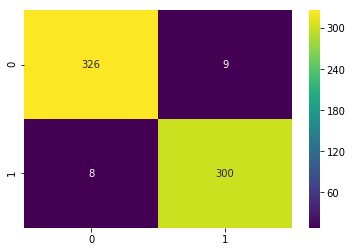

In [99]:
sns.heatmap(confusion_matrix(ry_test,pred), annot = True, cmap='viridis', fmt='g')

In [100]:
cnf_matrix = confusion_matrix(ry_test,pred)

In [101]:
tn, fp, fn, tp = cnf_matrix.ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

In [102]:

tpr*100

97.40259740259741

In [103]:
tnr*100

97.31343283582089

In [104]:
fpr*100

2.6865671641791042

In [105]:
fnr*100

2.5974025974025974

In [106]:
print("Precision: "+ str(tp/(tp+fp)*100))

Precision: 97.0873786407767


In [107]:
print("Recall: "+ str(tpr*100))

Recall: 97.40259740259741


In [108]:
from sklearn.externals import joblib

In [109]:
joblib.dump(knn_optimal, 'classifier3.pkl')

['classifier3.pkl']

In [110]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,1,0.284342,-1,0.937982,0,0.064246,0,-0.346831,0.490428,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,0,-0.989844,1,-0.666334,1,0.070822,0,-0.345876,2.134316,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,1,0.284342,1,0.860532,1,-0.411420,0,-0.174161,-0.444534,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,0,0.284342,1,-0.721656,0,-0.363196,0,-0.347783,-0.074659,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,1,0.284342,1,0.937982,0,1.079147,1,-0.174161,-0.372614,-1,1,1,-1


In [111]:
data.shape

(2142, 19)

In [112]:
old_data = pd.read_csv("final_cleaned_dataset.csv")

In [113]:
old_data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,yes,3,-1,300,N-N,0,253,0,3664,135,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,no,2,1,155,100,1,256,0,6619,295,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,yes,3,1,293,100,1,36,0,538000,44,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,no,3,1,150,N-N,0,58,0,717,80,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,yes,3,1,300,N-N,0,716,1,538000,51,-1,1,1,-1


In [114]:
old_data['SSL Expiry Date'].describe()

count    2142.000000
mean      223.690943
std       456.308753
min         8.000000
25%        69.000000
50%        88.500000
75%       253.000000
max      9803.000000
Name: SSL Expiry Date, dtype: float64

In [115]:
reduced_X.columns

Index(['ip_address', 'Anchor Tag', 'Forms', 'SSL Expiry Date',
       'SSL Cert Check', 'Redirects User', 'URL has HTTPS'],
      dtype='object')

In [117]:
reduced_X.head()

,ip_address,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Redirects User,URL has HTTPS
0,-1,0.937982,0,0.064246,0,1,1
1,-1,-0.666334,1,0.070822,0,1,1
2,-1,0.860532,1,-0.411420,0,1,-1
3,-1,-0.721656,0,-0.363196,0,1,-1
4,-1,0.937982,0,1.079147,1,1,-1


In [116]:
rX_train.columns

Index(['ip_address', 'Anchor Tag', 'Forms', 'SSL Expiry Date',
       'SSL Cert Check', 'Redirects User', 'URL has HTTPS'],
      dtype='object')

In [122]:
old_data['Anchor Tag'].describe()

count    2142.000000
mean      215.224090
std        90.402299
min         1.000000
25%       150.000000
50%       209.000000
75%       300.000000
max       300.000000
Name: Anchor Tag, dtype: float64

In [127]:
old_data['SSL Expiry Date'].describe()

count    2142.000000
mean      223.690943
std       456.308753
min         8.000000
25%        69.000000
50%        88.500000
75%       253.000000
max      9803.000000
Name: SSL Expiry Date, dtype: float64

In [232]:
pkl_model = joblib.load('classifier.pkl')

In [239]:
pkl_model.predict([rX_train.iloc[3]])

array(['0'], dtype=object)

In [240]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,1,0.284342,-1,0.937982,0,0.064246,0,-0.346831,0.490428,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,0,-0.989844,1,-0.666334,1,0.070822,0,-0.345876,2.134316,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,1,0.284342,1,0.860532,1,-0.411420,0,-0.174161,-0.444534,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,0,0.284342,1,-0.721656,0,-0.363196,0,-0.347783,-0.074659,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,1,0.284342,1,0.937982,0,1.079147,1,-0.174161,-0.372614,-1,1,1,-1


In [128]:
data.iloc[1414]

URL                        https://freeaccountcheck4004.000webhostapp.com...
embedded_domain_in_path                                                   -1
ip_address                                                                -1
dictionary_word                                                            1
targeted_brand                                                            -1
ext url                                                                   -1
Phishing                                                                   1
Subdomains                                                          0.284342
Prefix-Suffix                                                              1
Anchor Tag                                                          0.937982
Forms                                                                      0
SSL Expiry Date                                                    0.0642458
SSL Cert Check                                                             0

In [124]:
float(int(90.2))

90.0

In [146]:
reduced_X['Anchor Tag'].value_counts()

 0.937982    900
-0.721656    198
-2.370229    167
-0.168443    163
-1.274868     28
-0.201636     24
-0.068865     22
-0.677399     21
-0.035672     20
-0.223764     19
-0.179507     18
-0.102058     17
-0.157379     15
-0.124186     14
-0.079929     12
-0.090993     12
-0.245893     10
-0.135250     10
-0.533563      9
-0.113122      9
-0.810170      8
-0.268021      8
-0.909748      8
 0.384769      8
-0.212700      8
-0.002479      8
-0.256957      7
-0.046736      7
-0.057801      7
-0.345471      7
            ... 
-1.396575      1
-2.148944      1
 0.805211      1
 0.473283      1
 0.462219      1
 0.008585      1
 0.694568      1
-1.817016      1
-1.916594      1
 0.141356      1
-0.898684      1
 0.572862      1
 0.871596      1
 0.185613      1
 0.406898      1
-0.279086      1
-2.204265      1
-2.115751      1
 0.650311      1
 0.318384      1
-1.341253      1
 0.207741      1
-1.728502      1
-0.290150      1
-0.954005      1
 0.086035      1
-1.684245      1
 0.716697     